<a href="https://colab.research.google.com/github/McATung/AI/blob/main/BT2_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
kieuhinh=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [4]:
training_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/hinhbt4/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 103 images belonging to 3 classes.


In [5]:
validation_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/hinhbt4/validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 20 images belonging to 3 classes.


In [6]:
training_data.class_indices

{'dat': 0, 'duy': 1, 'tung': 2}

In [7]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [8]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
history=model.fit(training_data,epochs=100,batch_size=64,verbose=1, validation_data=validation_data, callbacks=[EarlyStopping(monitor='val_loss', patience=20)]) 

Epoch 1/100
4/4 [==============================] - 31s 3s/step - loss: 7.3019 - accuracy: 0.4272 - val_loss: 2.4526 - val_accuracy: 0.1000
Epoch 2/100
4/4 [==============================] - 1s 246ms/step - loss: 0.8377 - accuracy: 0.7184 - val_loss: 0.7828 - val_accuracy: 0.3000
Epoch 3/100
4/4 [==============================] - 1s 248ms/step - loss: 0.4275 - accuracy: 0.8350 - val_loss: 0.3272 - val_accuracy: 1.0000
Epoch 4/100
4/4 [==============================] - 1s 246ms/step - loss: 0.0921 - accuracy: 0.9612 - val_loss: 0.0434 - val_accuracy: 1.0000
Epoch 5/100
4/4 [==============================] - 1s 332ms/step - loss: 0.0315 - accuracy: 0.9903 - val_loss: 0.1005 - val_accuracy: 1.0000
Epoch 6/100
4/4 [==============================] - 1s 325ms/step - loss: 0.0403 - accuracy: 0.9709 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 7/100
4/4 [==============================] - 1s 237ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0165 - val_accuracy: 1.0000
Epoch 8/100
4/4

<function matplotlib.pyplot.show>

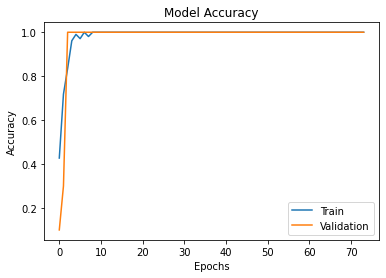

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [14]:
model.save("tung.h5")

In [15]:
model_CNN=load_model('tung.h5')

tung


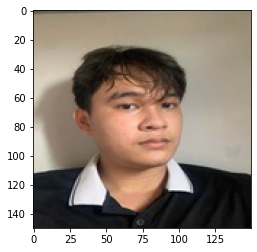

In [16]:
img=load_img("/content/drive/MyDrive/hinhbt4/face/tung/279462932_533122068396038_897680494986286699_n.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='dat'
if round(result[0][1])==1:
  prediction='duy'
if round(result[0][2])==1:
  prediction='tung'
print(prediction)

duy


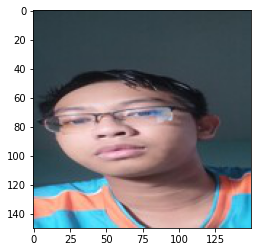

In [17]:
img=load_img("/content/drive/MyDrive/hinhbt4/face/duy/z3409226754956_d38e2bbb52d909b22747cb4625e8c391 (2) (1) - Copy - Copy.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='dat'
if round(result[0][1])==1:
  prediction='duy'
if round(result[0][2])==1:
  prediction='tung'
print(prediction)

dat


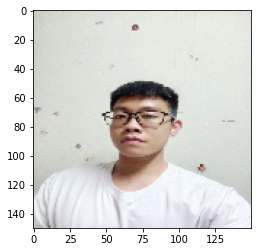

In [18]:
img=load_img("/content/drive/MyDrive/hinhbt4/face/dat/z3412116680532_34b6cdb10a6d41bfe4bb59f02ad0a287.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='dat'
if round(result[0][1])==1:
  prediction='duy'
if round(result[0][2])==1:
  prediction='tung'
print(prediction)